In [3]:
import pandas as pd
import glob
import numpy as np
import re

In [4]:
df_out=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final_out_for_model_training.tsv",sep="\t")
df_out.index=df_out["name"].values
df_out=df_out.drop(columns="name")

df_out

,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
CAG-83 sp900545495,216399,4410,6340,2609,10606,1846,100,234,1330,407,...,438,3032,466,18,0,2925,1666,26,3917,51
CAG-83 sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291
CAG-83 sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83 sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83 sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Acinetobacter sp900766635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rs-D84 sp900550495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,342,0,0,0,0
MGYG000004418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rs-D84 sp900550565,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,97,33,0,0,0


In [5]:
sample_sums = df_out.sum(axis=0)

# Find samples with total reads < 100k
low_read_samples = sample_sums[sample_sums < 100000].index.tolist()
print(f"Number of low-read samples (<100k): {len(low_read_samples)}")

df_filtered = df_out.drop(columns=low_read_samples)
df_filtered

Number of low-read samples (<100k): 5


,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
CAG-83 sp900545495,216399,4410,6340,2609,10606,1846,100,234,1330,407,...,438,3032,466,18,0,2925,1666,26,3917,51
CAG-83 sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291
CAG-83 sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83 sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83 sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Acinetobacter sp900766635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rs-D84 sp900550495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,342,0,0,0,0
MGYG000004418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rs-D84 sp900550565,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,97,33,0,0,0


In [6]:
import pandas as pd
import numpy as np

# Calculate prevalence for each species
species_prevalence = (df_filtered > 0).sum(axis=1) / df_filtered.shape[1]
species_prevalence_percent = (species_prevalence * 100).round().astype(int)  # round to nearest integer

# Count species at each exact prevalence percentage
prevalence_counts = species_prevalence_percent.value_counts().reindex(range(0, 101), fill_value=0)

print("Number of species at each exact prevalence percentage (0–100%):")
print(prevalence_counts)


Number of species at each exact prevalence percentage (0–100%):
0        2
1        8
2       10
3       13
4       15
      ... 
96      91
97     101
98     112
99     140
100     83
Name: count, Length: 101, dtype: int64


In [7]:
species_selected = df_filtered[species_prevalence_percent >= 20]
species_selected

,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
CAG-83 sp900545495,216399,4410,6340,2609,10606,1846,100,234,1330,407,...,438,3032,466,18,0,2925,1666,26,3917,51
CAG-83 sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291
CAG-83 sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83 sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83 sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lentilactobacillus kefiri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,235,167,0,313,116,0,13
Latilactobacillus curvatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,11,0,52,67,0,10
Lentilactobacillus buchneri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13,28,0,19,11,0,0
Campylobacter_A concisus_R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import pandas as pd
import numpy as np

# Assuming your dataframe is df_filtered (species x samples)

# Step 1: Add pseudocount to avoid log(0)
df_pseudo = species_selected + 1

# Step 2: Compute geometric mean for each species (row)
# CLR is log(value / geometric mean of row)
geometric_mean = np.exp(np.log(df_pseudo).mean(axis=1))  # row-wise geometric mean

# Step 3: Apply CLR transformation
df_clr = np.log(df_pseudo.div(geometric_mean, axis=0))

print("CLR-transformed table:")
print(df_clr)


CLR-transformed table:
                             ERR1018185  ERR1018186  ERR1018187  ERR1018188  \
CAG-83 sp900545495             5.611436    1.718409    2.081344    1.193658   
CAG-83 sp000435555             4.164486    0.381296    1.250844    1.457986   
CAG-83 sp003539495             5.471456    1.406861    5.218782    2.798950   
CAG-83 sp000431575             3.752683    4.594039    1.490038    5.175463   
CAG-83 sp900547745             5.222157    1.675730    1.661483    1.494496   
...                                 ...         ...         ...         ...   
Lentilactobacillus kefiri     -0.943185   -0.943185   -0.943185   -0.943185   
Latilactobacillus curvatus    -1.617676   -1.617676   -1.617676   -1.617676   
Lentilactobacillus buchneri   -1.079104   -1.079104   -1.079104   -1.079104   
Campylobacter_A concisus_R    -1.058664   -1.058664   -1.058664   -1.058664   
CAG-312 sp900545715           -1.260976   -1.260976   -1.260976   -1.260976   

                            

In [9]:
clr_df=df_clr.T
clr_df

,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,CAG-83 sp900545585,...,Lactobacillus helveticus,CAG-568 sp000434395,Zag1 sp001917115,MGYG000000581,CAG-267 sp001917135,Lentilactobacillus kefiri,Latilactobacillus curvatus,Lentilactobacillus buchneri,Campylobacter_A concisus_R,CAG-312 sp900545715
ERR1018185,5.611436,4.164486,5.471456,3.752683,5.222157,4.121749,4.846377,3.510590,3.392057,3.131909,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
ERR1018186,1.718409,0.381296,1.406861,4.594039,1.675730,1.377180,4.549167,2.147080,2.682404,1.712754,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
ERR1018187,2.081344,1.250844,5.218782,1.490038,1.661483,1.590397,3.113737,4.505178,2.419121,2.109703,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
ERR1018188,1.193658,1.457986,2.798950,5.175463,1.494496,0.938207,1.750027,1.197315,1.331083,1.270434,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
ERR1018189,2.595822,1.499296,2.167253,3.315467,3.159163,2.280459,2.259239,2.128779,2.712366,2.361662,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8865597,1.307944,3.342941,0.862897,-0.945873,1.503585,1.064992,0.145094,3.025666,0.866657,0.042280,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
SRR8865598,0.745333,0.396456,1.906181,-1.581680,0.727375,1.164781,-0.290516,-0.700132,1.056285,0.392641,...,7.254089,10.993826,-1.201397,-0.921585,-1.917436,4.806208,2.352616,1.916629,-1.058664,-1.260976
SRR8865599,-3.377611,-3.584004,-3.453321,-1.965705,-2.749661,-1.751980,-2.575881,-3.140303,-2.067150,-2.735763,...,2.107100,-1.158925,-1.201397,-0.921585,-1.917436,3.818989,2.601832,1.405803,-1.058664,-1.260976
SRR8865600,1.599889,1.297534,3.089083,-1.400908,1.631229,2.215175,0.568061,0.022531,1.331083,1.346636,...,2.941898,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976


In [10]:
df1=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final_out_for_model_training.tsv",sep="\t")
df1

,name,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
0,CAG-83 sp900545495,216399,4410,6340,2609,10606,1846,100,234,1330,...,438,3032,466,18,0,2925,1666,26,3917,51
1,CAG-83 sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,...,1744,73094,498,21,0,73394,3854,71,9491,291
2,CAG-83 sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,...,18562,1743,130,0,0,1572,4464,20,14572,236
3,CAG-83 sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,...,1175,2537,45,38,21,1219,645,439,773,654
4,CAG-83 sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,...,233,1847,331,15,0,2320,1067,32,2636,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Acinetobacter sp900766635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4626,Rs-D84 sp900550495,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,342,0,0,0,0
4627,MGYG000004418,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4628,Rs-D84 sp900550565,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,97,33,0,0,0


In [11]:
meta_df=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/meadata_crc.tsv",sep="\t")
meta_df['Health_status'] = meta_df['Health_status'].str.strip()

meta_df['class_label'] = meta_df['Health_status'].apply(lambda x: 1 if x == 'Healthy' else 0)

In [12]:
meta_df

,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II,0
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV,0
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN,1
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN,1
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN,1
5140,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN,1
5141,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN,0
5142,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN,0


In [13]:
merge_df=pd.merge(clr_df,meta_df, left_index=True,right_on="Run_ID")
merge_df

,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,CAG-83 sp900545585,...,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
5016,5.611436,4.164486,5.471456,3.752683,5.222157,4.121749,4.846377,3.510590,3.392057,3.131909,...,Non-healthy,CRC,Colorectal Cancer,MALE,64.0,China,Illumina HiSeq 2000 platform,23.1,NaN,0
5017,1.718409,0.381296,1.406861,4.594039,1.675730,1.377180,4.549167,2.147080,2.682404,1.712754,...,Non-healthy,CRC,Colorectal Cancer,MALE,73.0,China,Illumina HiSeq 2000 platform,23.8,NaN,0
5018,2.081344,1.250844,5.218782,1.490038,1.661483,1.590397,3.113737,4.505178,2.419121,2.109703,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,67.0,China,Illumina HiSeq 2000 platform,24.7,NaN,0
5019,1.193658,1.457986,2.798950,5.175463,1.494496,0.938207,1.750027,1.197315,1.331083,1.270434,...,Non-healthy,CRC,Colorectal Cancer,MALE,56.0,China,Illumina HiSeq 2000 platform,25.6,NaN,0
5020,2.595822,1.499296,2.167253,3.315467,3.159163,2.280459,2.259239,2.128779,2.712366,2.361662,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,59.0,China,Illumina HiSeq 2000 platform,20.7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.307944,3.342941,0.862897,-0.945873,1.503585,1.064992,0.145094,3.025666,0.866657,0.042280,...,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,India,ILLUMINA,19.1,III,0
630,0.745333,0.396456,1.906181,-1.581680,0.727375,1.164781,-0.290516,-0.700132,1.056285,0.392641,...,Non-Healthy,CRC,Colorectal Cancer,MALE,62.0,India,ILLUMINA,20.1,I,0
631,-3.377611,-3.584004,-3.453321,-1.965705,-2.749661,-1.751980,-2.575881,-3.140303,-2.067150,-2.735763,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,65.0,India,ILLUMINA,21.0,III,0
628,1.599889,1.297534,3.089083,-1.400908,1.631229,2.215175,0.568061,0.022531,1.331083,1.346636,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,41.0,India,ILLUMINA,19.2,I,0


In [14]:
ml_df = merge_df.drop(columns=['Run_ID','BioProject','BioSample','Health_status','Phenotype',
                               'Full_Name','Sex','Age','Location','Platform','BMI','CRC stage'])
ml_df

,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,CAG-83 sp900545585,...,CAG-568 sp000434395,Zag1 sp001917115,MGYG000000581,CAG-267 sp001917135,Lentilactobacillus kefiri,Latilactobacillus curvatus,Lentilactobacillus buchneri,Campylobacter_A concisus_R,CAG-312 sp900545715,class_label
5016,5.611436,4.164486,5.471456,3.752683,5.222157,4.121749,4.846377,3.510590,3.392057,3.131909,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0
5017,1.718409,0.381296,1.406861,4.594039,1.675730,1.377180,4.549167,2.147080,2.682404,1.712754,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0
5018,2.081344,1.250844,5.218782,1.490038,1.661483,1.590397,3.113737,4.505178,2.419121,2.109703,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0
5019,1.193658,1.457986,2.798950,5.175463,1.494496,0.938207,1.750027,1.197315,1.331083,1.270434,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0
5020,2.595822,1.499296,2.167253,3.315467,3.159163,2.280459,2.259239,2.128779,2.712366,2.361662,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.307944,3.342941,0.862897,-0.945873,1.503585,1.064992,0.145094,3.025666,0.866657,0.042280,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0
630,0.745333,0.396456,1.906181,-1.581680,0.727375,1.164781,-0.290516,-0.700132,1.056285,0.392641,...,10.993826,-1.201397,-0.921585,-1.917436,4.806208,2.352616,1.916629,-1.058664,-1.260976,0
631,-3.377611,-3.584004,-3.453321,-1.965705,-2.749661,-1.751980,-2.575881,-3.140303,-2.067150,-2.735763,...,-1.158925,-1.201397,-0.921585,-1.917436,3.818989,2.601832,1.405803,-1.058664,-1.260976,0
628,1.599889,1.297534,3.089083,-1.400908,1.631229,2.215175,0.568061,0.022531,1.331083,1.346636,...,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976,0


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# --- Step 1: Prepare X and y ---
X = ml_df.drop(columns=['class_label']).values  # features
y = ml_df['class_label'].values                 # labels


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import gmean
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#  X and y are  defined
# X: feature matrix (OTU table after CLR transformation)
# y: target variable (Class_Label: 1 for Healthy, 0 for Non-Healthy)

# Feature Selection Methods

# 1. Variance Threshold (Filter Method)
selector_var = VarianceThreshold(threshold=0.01)

# Get the column names before converting to numpy array
feature_names = ml_df.drop(columns=['class_label']).columns

X_var = selector_var.fit_transform(X)
# Fit: Computes the variance of each feature in X. & Transform: Removes the low-variance features and returns a reduced dataset X_var.
#Result: A NumPy array with only the features that passed the variance threshold.
selected_features_var = feature_names[selector_var.get_support()] # returns a Boolean mask array indicating which features were selected ( those with variance > 0.01).
# X.columns[...] applies that mask to the column names of the original DataFrame X.
X_var_df = pd.DataFrame(X_var, columns=selected_features_var)
print(f"Selected features with variance > 0.01: {len(selected_features_var)}")

Selected features with variance > 0.01: 4223


In [17]:
X_var

array([[ 5.61143603,  4.16448575,  5.47145586, ..., -1.07910366,
        -1.05866371, -1.26097608],
       [ 1.7184089 ,  0.38129621,  1.40686065, ..., -1.07910366,
        -1.05866371, -1.26097608],
       [ 2.08134397,  1.25084367,  5.21878194, ..., -1.07910366,
        -1.05866371, -1.26097608],
       ...,
       [-3.37761093, -3.58400423, -3.45332083, ...,  1.40580299,
        -1.05866371, -1.26097608],
       [ 1.5998888 ,  1.29753427,  3.08908252, ..., -1.07910366,
        -1.05866371, -1.26097608],
       [-2.72220408, -2.18391655, -1.02978312, ..., -1.07910366,
        -1.05866371, -1.26097608]])

In [18]:
X_var_df

,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,CAG-83 sp900545585,...,Lactobacillus helveticus,CAG-568 sp000434395,Zag1 sp001917115,MGYG000000581,CAG-267 sp001917135,Lentilactobacillus kefiri,Latilactobacillus curvatus,Lentilactobacillus buchneri,Campylobacter_A concisus_R,CAG-312 sp900545715
0,5.611436,4.164486,5.471456,3.752683,5.222157,4.121749,4.846377,3.510590,3.392057,3.131909,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
1,1.718409,0.381296,1.406861,4.594039,1.675730,1.377180,4.549167,2.147080,2.682404,1.712754,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
2,2.081344,1.250844,5.218782,1.490038,1.661483,1.590397,3.113737,4.505178,2.419121,2.109703,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
3,1.193658,1.457986,2.798950,5.175463,1.494496,0.938207,1.750027,1.197315,1.331083,1.270434,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
4,2.595822,1.499296,2.167253,3.315467,3.159163,2.280459,2.259239,2.128779,2.712366,2.361662,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,1.307944,3.342941,0.862897,-0.945873,1.503585,1.064992,0.145094,3.025666,0.866657,0.042280,...,-1.721541,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976
4302,0.745333,0.396456,1.906181,-1.581680,0.727375,1.164781,-0.290516,-0.700132,1.056285,0.392641,...,7.254089,10.993826,-1.201397,-0.921585,-1.917436,4.806208,2.352616,1.916629,-1.058664,-1.260976
4303,-3.377611,-3.584004,-3.453321,-1.965705,-2.749661,-1.751980,-2.575881,-3.140303,-2.067150,-2.735763,...,2.107100,-1.158925,-1.201397,-0.921585,-1.917436,3.818989,2.601832,1.405803,-1.058664,-1.260976
4304,1.599889,1.297534,3.089083,-1.400908,1.631229,2.215175,0.568061,0.022531,1.331083,1.346636,...,2.941898,-1.158925,-1.201397,-0.921585,-1.917436,-0.943185,-1.617676,-1.079104,-1.058664,-1.260976


In [19]:
# 2. Univariate Feature Selection using ANOVA F-test (Filter Method)
selector_anova = SelectKBest(f_classif, k=100)
X_anova = selector_anova.fit_transform(X, y)

#  `f_classif` is the scoring function based on ANOVA F-test for classification.
#  It measures the linear dependency between each feature and the target variable y.
#  For each feature, it computes an F-statistic and a p-value.
#  Higher F-statistic → more relevant feature.
# k=100 means: Keep the top 100 features that have the highest F-scores.

selected_features_anova = feature_names[selector_anova.get_support()]
X_anova_df = pd.DataFrame(X_anova, columns=selected_features_anova)
print(f"Selected top 100 features using ANOVA: {selected_features_anova}")

Selected top 100 features using ANOVA: Index(['Faecalibacterium prausnitzii_E', 'Faecalibacterium sp900539945',
       'Faecalibacterium prausnitzii_I', 'Faecalibacterium prausnitzii_G',
       'Faecalibacterium prausnitzii_H', 'Faecalibacterium prausnitzii_F',
       'Ruminococcus_C sp000433635', 'MGYG000000605',
       'Eubacterium_R sp000434995', 'Butyricicoccus_A sp002395695',
       'Coprococcus sp900066115', 'Coprococcus sp000433075',
       'Anaerostipes hadrus', 'Anaerostipes sp900066705',
       'Anaerostipes hadrus_A', 'Agathobacter rectalis',
       'Agathobacter sp900546625', 'Agathobacter faecis',
       'Lachnospira eligens_A', 'Lachnospira sp900316325',
       'Lachnospira sp003537285', 'Lachnospira sp000436475',
       'Lachnospira sp000437735', 'Lachnospira sp900772425',
       'Lachnospira sp000436535', 'Lachnospira sp900545725',
       'Lachnospira sp900551945', 'Eubacterium_I ramulus_A',
       'Roseburia sp003470905', 'Roseburia intestinalis',
       'Roseburia sp0

In [20]:
# 3. Mutual Information (Filter Method)
selector_mi = SelectKBest(mutual_info_classif, k=100)
X_mi = selector_mi.fit_transform(X, y)
selected_features_mi = feature_names[selector_mi.get_support()]#Retrieves the names of the selected features by applying the boolean mask from .get_support().
X_mi_df = pd.DataFrame(X_mi, columns=selected_features_mi)
print(f"Selected top 100 features using Mutual Information: {selected_features_mi}")

Selected top 100 features using Mutual Information: Index(['Dysosmobacter welbionis', 'CAG-103 sp900757655',
       'Lawsonibacter sp900549405', 'Faecalibacterium prausnitzii_E',
       'Faecalibacterium prausnitzii_J', 'Faecalibacterium sp900539945',
       'Faecalibacterium prausnitzii_I', 'Faecalibacterium prausnitzii_G',
       'Faecalibacterium sp900539885', 'Faecalibacterium prausnitzii_F',
       'Neobittarella massiliensis', 'Ruminococcus_D bicirculans',
       'CAG-353 sp900066885', 'Eubacterium_R sp000436835',
       'Eubacterium_R sp003526845', 'UMGS856 sp900546265',
       'UMGS1696 sp900554225', 'Agathobaculum butyriciproducens',
       'Blautia_A wexlerae_B', 'Blautia_A luti', 'Blautia_A sp900548245',
       'MGYG000001189', 'Acetatifactor sp900772845', 'Coprococcus sp900066115',
       'Coprococcus sp000433075', 'Coprococcus eutactus_A',
       'Anaerostipes hadrus_A', 'Agathobacter rectalis',
       'Agathobacter sp900550545', 'Agathobacter sp900552085',
       'Lachnos

In [21]:
# 4. Recursive Feature Elimination (Wrapper Method) with Logistic Regression (Optimized)

# Recursive Feature Elimination (RFE) using Logistic Regression as the base model, selecting the top 50 most important features from dataset X in relation to the target variable y.
model_lr = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)  # Faster solver and reduced max_iter
# max_iter=500: Sets the maximum number of iterations for convergence.
selector_rfe = RFE(model_lr, n_features_to_select=50, step=0.1)  # Step=0.1 removes 10% of features per iteration
X_rfe = selector_rfe.fit_transform(X, y)
selected_features_rfe = feature_names[selector_rfe.get_support()]
X_rfe_df = pd.DataFrame(X_rfe, columns=selected_features_rfe)
print(f"Selected top 50 features using RFE: {selected_features_rfe}")

Selected top 50 features using RFE: Index(['UBA1777 sp002320035', 'MGYG000003980', 'Gemmiger sp900548355',
       'MGYG000004854', 'D5 sp900113995', 'Eubacterium_R sp900539425',
       'MGYG000004049', 'UMGS1839 sp900555545', 'UMGS1307 sp900550505',
       'UBA644 sp002299265', 'Blautia_A massiliensis', 'Blautia_A sp900066205',
       'MGYG000004203', 'Coprococcus sp000433075', 'Lachnospira sp000436535',
       'UMGS1375 sp900551235', 'Blautia sp001304935', 'Blautia sp900753905',
       'Enterocloster sp900540675', 'UBA9502 sp003480315',
       'Butyrivibrio_A sp900771195', 'MGYG000004039',
       'Catenibacillus sp902363555', 'Stomatobaculum longum', 'MGYG000002201',
       'MGYG000004306', 'Peptostreptococcus anaerobius',
       'Clostridium_X cadaveris', 'MGYG000000727', 'UBA7597 sp900767195',
       'Phytobacter massiliensis', 'Bacteroides massiliensis_A',
       'Phocaeicola sp900542985', 'Phocaeicola sp900552075',
       'Phocaeicola sp002161765', 'Prevotella sp000436915',
      

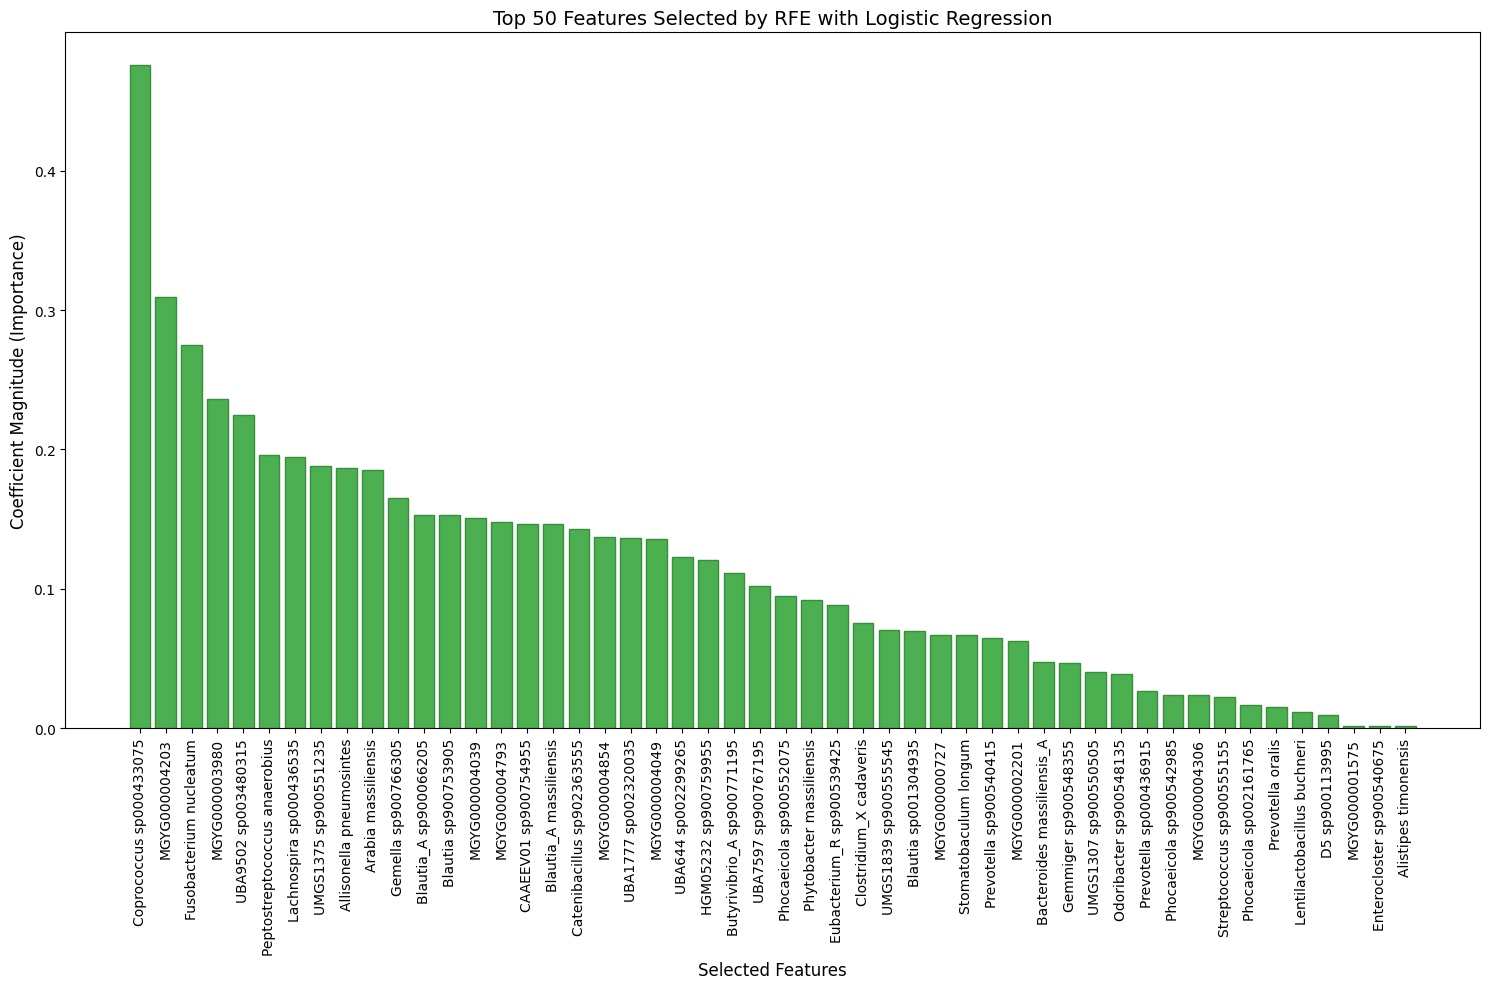

In [22]:

# Fit Logistic Regression on the selected features to get coefficients
model_lr_fitted = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
model_lr_fitted.fit(X_rfe, y)
coefficients = np.abs(model_lr_fitted.coef_[0])  # Absolute values for importance

# Extracts the learned coefficients from the model.
# model_lr_fitted.coef_ returns a 2D array (since scikit-learn expects multi-class by default).
# [0] selects the coefficients for the binary classification case.
# Takes the absolute value of the coefficients:
# Why? Because in feature importance, we often care about the magnitude of the effect, not the direction (positive or negative).

# Create DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': coefficients
})

# Sort by importance for better visualization
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(15, 10))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='#4CAF50', edgecolor='#388E3C')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Selected Features', fontsize=12)
plt.ylabel('Coefficient Magnitude (Importance)', fontsize=12)
plt.title('Top 50 Features Selected by RFE with Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
# 5. Feature Importance from Random Forest (Embedded Method)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)
selector_rf = SelectFromModel(model_rf, prefit=True, threshold="mean")

# SelectFromModel: A meta-transformer that selects features based on feature importance provided by an estimator (here, the random forest).
# model_rf: The pre-trained Random Forest model is already fitted, so prefit=True.
# threshold="mean": Select features whose importance is above the mean importance.

X_rf = selector_rf.transform(X)#Apply the selector to X to retain only the most important features.
selected_features_rf = feature_names[selector_rf.get_support()]
X_rf_df = pd.DataFrame(X_rf, columns=selected_features_rf)
print(f"Selected features using RF importance (threshold=mean): {len(selected_features_rf)}")

Selected features using RF importance (threshold=mean): 1525


In [ ]:
# 6. L1 Regularization (Lasso) for Feature Selection (Embedded Method)
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42, n_alphas=50, n_jobs=-1, max_iter=5000)
lasso.fit(X, y)

selected_features_lasso = feature_names[lasso.coef_ != 0]
X_lasso = X[:, lasso.coef_ != 0]

In [25]:
# Prepare datasets for modeling
datasets = {
    'Original': X,
    'Variance_Threshold': X_var_df,
    'ANOVA': X_anova_df,
    'Mutual_Info': X_mi_df,
    'RFE': X_rfe_df,
    'RF_Importance': X_rf_df,
    'Lasso': X_lasso
}

# Model Building and Evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}
# Each value is created by make_scorer()
#  which wraps standard metric functions from sklearn.metrics to make them compatible with model evaluation tools
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Perform cross-validation
results = {}
for ds_name, ds_X in datasets.items():
    results[ds_name] = {}
    for model_name, model in models.items():
        cv_results = cross_validate(model, ds_X, y, cv=5, scoring=scoring)
        results[ds_name][model_name] = {
            'Accuracy': cv_results['test_accuracy'].mean(),
            'Precision': cv_results['test_precision'].mean(),
            'Recall': cv_results['test_recall'].mean(),
            'F1': cv_results['test_f1'].mean(),
            'ROC_AUC': cv_results['test_roc_auc'].mean()
        }
        print(f"Completed {model_name} on {ds_name}")

# Model Comparison
comparison_data = []
for ds_name, ds_results in results.items():
    for model_name, metrics in ds_results.items():
        row = {'Dataset': ds_name, 'Model': model_name}
        row.update(metrics)
        comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison Table:")
print(comparison_df)


Completed LogisticRegression on Original
Completed RandomForest on Original
Completed SVM on Original
Completed LogisticRegression on Variance_Threshold
Completed RandomForest on Variance_Threshold
Completed SVM on Variance_Threshold
Completed LogisticRegression on ANOVA
Completed RandomForest on ANOVA
Completed SVM on ANOVA
Completed LogisticRegression on Mutual_Info
Completed RandomForest on Mutual_Info
Completed SVM on Mutual_Info
Completed LogisticRegression on RFE
Completed RandomForest on RFE
Completed SVM on RFE
Completed LogisticRegression on RF_Importance
Completed RandomForest on RF_Importance
Completed SVM on RF_Importance
Completed LogisticRegression on Lasso
Completed RandomForest on Lasso
Completed SVM on Lasso

Model Comparison Table:
               Dataset               Model  Accuracy  Precision    Recall  \
0             Original  LogisticRegression  0.578952   0.463535  0.600734   
1             Original        RandomForest  0.557805   0.410965  0.277516   
2        

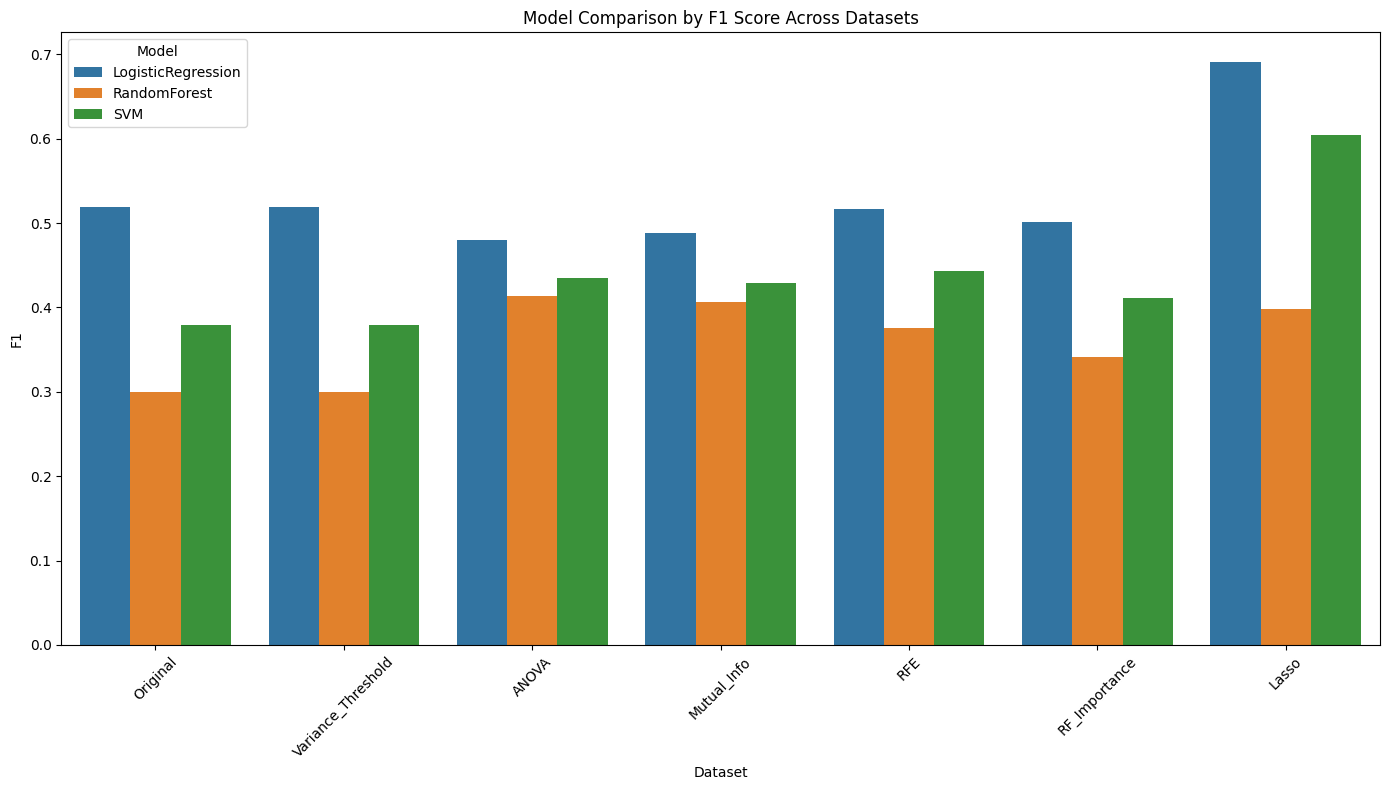

In [26]:
# Visualize comparison (Bar plot for F1 scores)
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_df, x='Dataset', y='F1', hue='Model')
plt.title('Model Comparison by F1 Score Across Datasets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

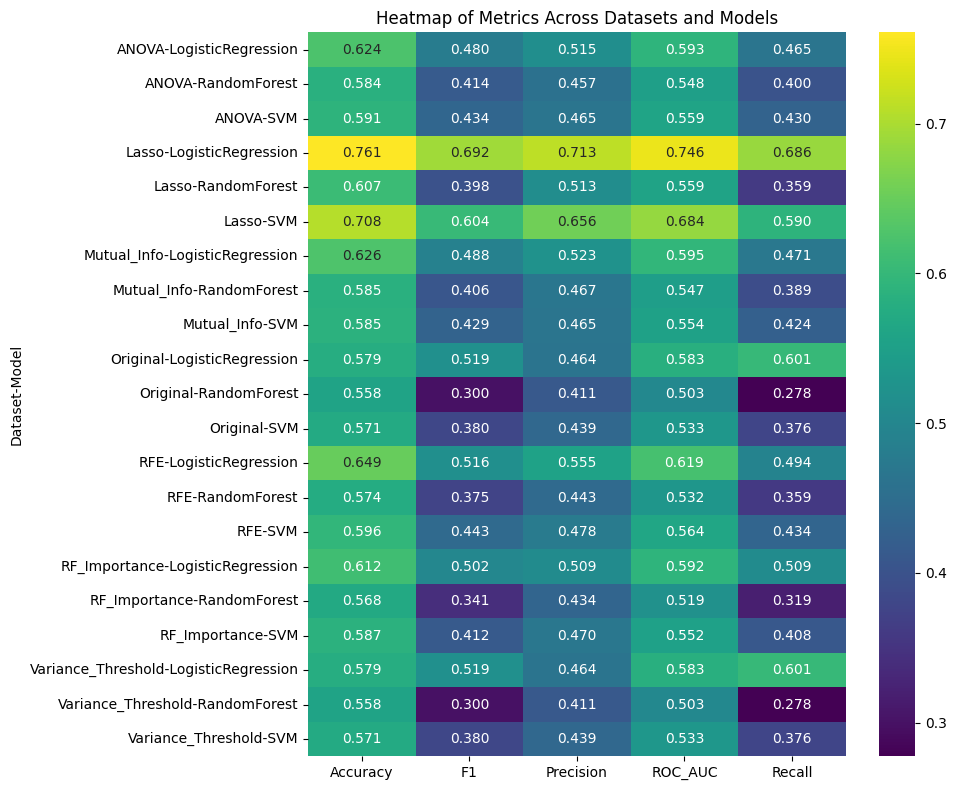

In [27]:
# Heatmap for all metrics
pivot_df = comparison_df.pivot_table(index=['Dataset', 'Model'], values=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.3f')
plt.title('Heatmap of Metrics Across Datasets and Models')
plt.tight_layout()
plt.show()

In [38]:
# Heatmap for all metrics
pivot_df = comparison_df.pivot_table(
    index=['Dataset', 'Model'],
    values=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.3f')
plt.title('Heatmap of Metrics Across Datasets and Models')
plt.tight_layout()

# Save the figure before showing it
plt.savefig('heatmap_metrics.jpg', format='jpg', dpi=300)

plt.show()


KeyError: 'F1'

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Selection
# We'll use two methods: univariate selection (ANOVA F-test) and recursive feature elimination (RFE) with RandomForest

# Use the original DataFrame to retain column names for feature selection
X_df = ml_df.drop(columns=['class_label'])
y = ml_df['class_label'].values  # labels as NumPy array

# 1.1 Univariate feature selection: Select top k features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=100)  # Select top 100 features (adjust k as needed)
X_selected_uni = selector.fit_transform(X_df, y)
selected_features_uni = X_df.columns[selector.get_support()].tolist()
print(f"Selected {len(selected_features_uni)} features using ANOVA F-test: {selected_features_uni}")

# 1.2 RFE with RandomForest
rf = RandomForestClassifier(random_state=42)
# Use X_df for RFE fitting to get feature names
rfe = RFE(estimator=rf, n_features_to_select=100, step=0.1)  # Select top 100 features
X_selected_rfe = rfe.fit_transform(X_df, y)
selected_features_rfe = X_df.columns[rfe.support_].tolist()
print(f"Selected {len(selected_features_rfe)} features using RFE: {selected_features_rfe}")

# we'll proceed with univariate selected features (X_selected_uni)

X_selected = X_selected_uni

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Building and Hyperparameter Tuning
# We'll tune and compare three models: RandomForest, SVM, LogisticRegression

# Define models and parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }
}

# Dictionary to store results
results = {}

# Hyperparameter tuning with GridSearchCV and 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                               cv=cv, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'classification_report': classification_report(y_test, y_pred)
    }

# Step 4: Evaluation and Comparison
# Print results for each model
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC-AUC: N/A")
    print("Classification Report:")
    print(metrics['classification_report'])

# Compare models in a DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] if results[name]['roc_auc'] is not None else 'N/A' for name in results]
})

print("\nModel Comparison:")
print(comparison_df)

Selected 100 features using ANOVA F-test: ['Faecalibacterium prausnitzii_E', 'Faecalibacterium sp900539945', 'Faecalibacterium prausnitzii_I', 'Faecalibacterium prausnitzii_G', 'Faecalibacterium prausnitzii_H', 'Faecalibacterium prausnitzii_F', 'Ruminococcus_C sp000433635', 'MGYG000000605', 'Eubacterium_R sp000434995', 'Butyricicoccus_A sp002395695', 'Coprococcus sp900066115', 'Coprococcus sp000433075', 'Anaerostipes hadrus', 'Anaerostipes sp900066705', 'Anaerostipes hadrus_A', 'Agathobacter rectalis', 'Agathobacter sp900546625', 'Agathobacter faecis', 'Lachnospira eligens_A', 'Lachnospira sp900316325', 'Lachnospira sp003537285', 'Lachnospira sp000436475', 'Lachnospira sp000437735', 'Lachnospira sp900772425', 'Lachnospira sp000436535', 'Lachnospira sp900545725', 'Lachnospira sp900551945', 'Eubacterium_I ramulus_A', 'Roseburia sp003470905', 'Roseburia intestinalis', 'Roseburia sp003483745', 'Roseburia sp900753715', 'Eubacterium_F sp000433735', 'Blautia stercoris', 'UBA9502 sp003480315',

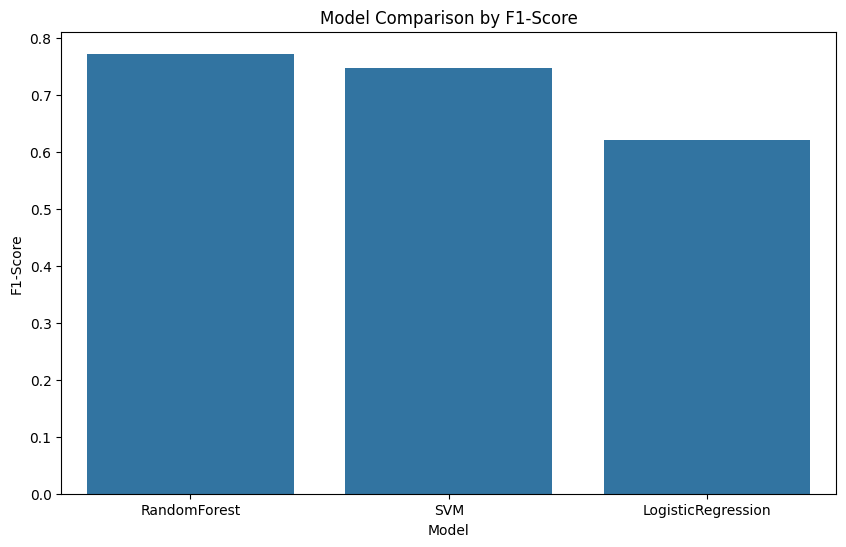

In [31]:

# Visualize comparison (bar plot for F1-Score)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=comparison_df)
plt.title('Model Comparison by F1-Score')
plt.ylabel('F1-Score')
plt.show()
